<a href="https://colab.research.google.com/github/makkolli31/StillWork/blob/master/StillWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# univariate cnn example
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np


In [148]:
#col_names_new = ['RequestRPM', 'CurrentRPM','WaterFreq', 'vibX', 'vibY', 'vibZ', 'UB', 'QCurrent2', 'RinseStep']
#df = pd.read_csv("/content/drive/My Drive/StillWork/V600_no01_1kgTowel_C3_HIGH_20190611_01_001.txt1_Extract.txt", sep=' ', header=None)
#df.columns = col_names_new
path = '/content/drive/My Drive/StillWork/'
df1 = pd.read_csv(path + "1kgTowel_Extract.txt", sep=' ')
df2 = pd.read_csv(path + "T셔츠_Extract.txt", sep=' ')
df3 = pd.read_csv(path + "Y셔츠_Extract.txt", sep=' ')
df4 = pd.read_csv(path + "동1타200_Extract.txt", sep=' ')
df5 = pd.read_csv(path + "동잠바_Extract.txt", sep=' ')
df6 = pd.read_csv(path + "실용2_Extract.txt", sep=' ')
df7 = pd.read_csv(path + "실용3_Extract.txt", sep=' ')
df8 = pd.read_csv(path + "실용4_Extract.txt", sep=' ')
df9 = pd.read_csv(path + "청바지_Extract.txt", sep=' ')
df10 = pd.read_csv(path + "청팬티_Extract.txt", sep=' ')
df11 = pd.read_csv(path + "추잠바_Extract.txt", sep=' ')
df12 = pd.read_csv(path + "타월2_Extract.txt", sep=' ')
df13 = pd.read_csv(path + "타월3_Extract.txt", sep=' ')
df14 = pd.read_csv(path + "타월4_Extract.txt", sep=' ')
df15 = pd.read_csv(path + "후드티_Extract.txt", sep=' ')

df1 = df1.iloc[:df1.shape[0] - df1.shape[0] % 140]
df2 = df2.iloc[:df2.shape[0] - df2.shape[0] % 140]
df3 = df3.iloc[:df3.shape[0] - df3.shape[0] % 140]
df4 = df4.iloc[:df4.shape[0] - df4.shape[0] % 140]
df5 = df5.iloc[:df5.shape[0] - df5.shape[0] % 140]
df6 = df6.iloc[:df6.shape[0] - df6.shape[0] % 140]
df7 = df7.iloc[:df7.shape[0] - df7.shape[0] % 140]
df8 = df8.iloc[:df8.shape[0] - df8.shape[0] % 140]
df9 = df9.iloc[:df9.shape[0] - df9.shape[0] % 140]
df10 = df10.iloc[:df10.shape[0] - df10.shape[0] % 140]
df11 = df11.iloc[:df11.shape[0] - df11.shape[0] % 140]
df12 = df12.iloc[:df12.shape[0] - df12.shape[0] % 140]
df13 = df13.iloc[:df13.shape[0] - df13.shape[0] % 140]
df14 = df14.iloc[:df14.shape[0] - df14.shape[0] % 140]
df15 = df15.iloc[:df15.shape[0] - df15.shape[0] % 140]
df_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)

normalized_df=(df_data-df_data.mean())/df_data.std()

#with pd.option_context('display.float_format', '{:0.2f}'.format):
normalized_df.describe()

,RequestRPM,CurrentRPM,WaterFreq,vibX,vibY,vibZ,UB,QCurrent2,RinseStep
count,1.181572e+07,1.181572e+07,1.181572e+07,1.181572e+07,1.181572e+07,1.181572e+07,1.181572e+07,1.181572e+07,11815720.0
mean,-4.481405e-13,3.612324e-13,-1.264080e-12,5.530190e-14,-1.558708e-14,-2.640006e-14,1.833307e-13,-3.421613e-15,0.0
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
min,-2.539603e+00,-3.680794e+00,-2.588347e+01,-1.314603e+00,-7.503958e-01,-6.187477e-01,-6.328122e-01,-1.908177e+00,0.0
25%,-2.272483e-02,-6.036572e-02,-2.849066e-01,-6.314166e-01,-4.132257e-01,-3.143370e-01,-4.616765e-01,-7.063041e-01,0.0
50%,-2.272483e-02,1.922223e-01,5.044567e-02,-2.789793e-01,-2.764379e-01,-1.982362e-01,-3.437830e-01,-1.940015e-01,0.0
75%,-2.272483e-02,3.606143e-01,2.740139e-01,2.903424e-01,-3.165962e-02,1.400501e-03,-1.022915e-01,5.239311e-01,0.0
max,6.824759e+01,3.698588e+01,1.727207e+00,3.340318e+01,1.992737e+01,2.755410e+01,5.499389e+01,2.033178e+01,0.0


In [164]:
features = ['RequestRPM', 'CurrentRPM', 'UB', 'WaterFreq', 'QCurrent2']
X_all = normalized_df[features].values
X1 = df1[features].values
X2 = df2[features].values
X3 = df3[features].values
X4 = df4[features].values
X5 = df5[features].values
X6 = df6[features].values
X7 = df7[features].values
X8 = df8[features].values
X9 = df9[features].values
X10 = df10[features].values
X11 = df11[features].values
X12 = df12[features].values
X13 = df13[features].values
X14 = df14[features].values
X15 = df15[features].values

print(X_all.shape)
print(X1.shape[0] + X2.shape[0] + X3.shape[0] + X4.shape[0] + X5.shape[0] + X6.shape[0] + X7.shape[0] + X8.shape[0] + X9.shape[0] + X10.shape[0] + X11.shape[0] + X12.shape[0] + X13.shape[0] + X14.shape[0] + X15.shape[0])

(11815720, 5)
11815720


In [0]:
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(0,len(sequences), n_steps_in):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the dataset
    if end_ix > len(sequences):
        print(end_ix, len(sequences))
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [161]:
X1_data, _ = split_sequences(X1, 140, 1)
X2_data, _ = split_sequences(X2, 140, 1)
X3_data, _ = split_sequences(X3, 140, 1)
X4_data, _ = split_sequences(X4, 140, 1)
X5_data, _ = split_sequences(X5, 140, 1)
X6_data, _ = split_sequences(X6, 140, 1)
X7_data, _ = split_sequences(X7, 140, 1)
X8_data, _ = split_sequences(X8, 140, 1)
X9_data, _ = split_sequences(X9, 140, 1)
X10_data, _ = split_sequences(X10, 140, 1)
X11_data, _ = split_sequences(X11, 140, 1)
X12_data, _ = split_sequences(X12, 140, 1)
X13_data, _ = split_sequences(X13, 140, 1)
X14_data, _ = split_sequences(X14, 140, 1)
X15_data, _ = split_sequences(X15, 140, 1)

# X_data2 = np.vstack((X1_data, X2_data, X3_data, X4_data, X5_data, X6_data, X7_data, X8_data, X9_data, X10_data, X11_data, X12_data, X13_data, X14_data, X15_data))
X_data, _ = split_sequences(X_all, 140, 1)

# print(X1.shape[0]/140, X1_data.shape[0])
# print(X2.shape[0]/140, X2_data.shape[0])
# print(X3.shape[0]/140, X3_data.shape[0])
# print(X4.shape[0]/140, X4_data.shape[0])
# print(X5.shape[0]/140, X5_data.shape[0])
# print(X6.shape[0]/140, X6_data.shape[0])
# print(X7.shape[0]/140, X7_data.shape[0])
# print(X8.shape[0]/140, X8_data.shape[0])
# print(X9.shape[0]/140, X9_data.shape[0])
# print(X10.shape[0]/140, X10_data.shape[0])
# print(X11.shape[0]/140, X11_data.shape[0])
# print(X12.shape[0]/140, X12_data.shape[0])
# print(X13.shape[0]/140, X13_data.shape[0])
# print(X14.shape[0]/140, X14_data.shape[0])
# print(X15.shape[0]/140, X15_data.shape[0])
# print(X_data2.shape, X_data.shape)

# y_all = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], (X_data.shape[0],1))

LABELS = ['1kgTowel', 'TShirts', 'YShirts', 'WinterT200', 'WinterJumper', 'Real2', 'Real3', 'Real4', 'Jean', 'Jeanpants', 'FallJumper', 'Towel2', 'Towel3', 'Towel4', 'Hood']

y1 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], (X1_data.shape[0],1))
y2 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], (X2_data.shape[0],1))
y3 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], (X3_data.shape[0],1))
y4 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], (X4_data.shape[0],1))
y5 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], (X5_data.shape[0],1))
y6 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], (X6_data.shape[0],1))
y7 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], (X7_data.shape[0],1))
y8 = np.tile([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], (X8_data.shape[0],1))
y9 = np.tile([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], (X9_data.shape[0],1))
y10 = np.tile([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X10_data.shape[0],1))
y11 = np.tile([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X11_data.shape[0],1))
y12 = np.tile([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X12_data.shape[0],1))
y13 = np.tile([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X13_data.shape[0],1))
y14 = np.tile([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X14_data.shape[0],1))
y15 = np.tile([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X15_data.shape[0],1))
y = np.vstack((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15))

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

# scaler = StandardScaler()
# scaler.fit(X_data)
# X_sc = scaler.transform(X_data)
# np.mean(X_sc), np.std(X_sc)

# scalers = {}
# X_sc = np.empty_like(X_data)
# for i in range(X_data.shape[2]):
#     scalers[i] = StandardScaler()
#     X_sc[:, :, i] = scalers[i].fit_transform(X_data[:, :, i]) 

# for i in range(X_test.shape[1]):
    # X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 


X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2)
X_data.shape, y.shape

((84398, 140, 5), (84398, 15))

In [162]:
# define model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', padding='same', input_shape=(X_data.shape[1], X_data.shape[2]))) 
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))
#model.compile(optimizer='adam', loss='mse')
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 140, 32)           352       
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 70, 32)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 70, 64)            4160      
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 35, 64)            0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 35, 128)           16512     
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 17, 128)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 17, 256)         

In [163]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
]

BATCH_SIZE = 100
EPOCHS = 30

history = model.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

_, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

print(accuracy)
# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Train on 54014 samples, validate on 13504 samples
Epoch 1/30
54014/54014 [==============================] - 25s 454us/step - loss: 0.9963 - acc: 0.6211 - val_loss: 0.7177 - val_acc: 0.7221
Epoch 2/30
54014/54014 [==============================] - 23s 418us/step - loss: 0.5869 - acc: 0.7804 - val_loss: 0.5131 - val_acc: 0.8097
Epoch 3/30
54014/54014 [==============================] - 22s 412us/step - loss: 0.4723 - acc: 0.8223 - val_loss: 0.5097 - val_acc: 0.8081
Epoch 4/30
54014/54014 [==============================] - 22s 407us/step - loss: 0.4033 - acc: 0.8486 - val_loss: 0.3971 - val_acc: 0.8463
Epoch 5/30
54014/54014 [==============================] - 22s 416us/step - loss: 0.3603 - acc: 0.8628 - val_loss: 0.3657 - val_acc: 0.8640
Epoch 6/30
54014/54014 [==============================] - 22s 409us/step - loss: 0.3202 - acc: 0.8776 - val_loss: 0.3508 - val_acc: 0.8694
Epoch 7/30
54014/54014 [==============================] - 22s 408us/step - loss: 0.2918 - acc: 0.8885 - val_loss: 0.

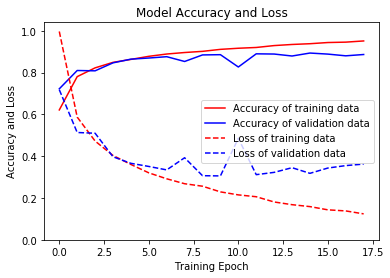

In [165]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [0]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 8))
    
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    
    plt.show()

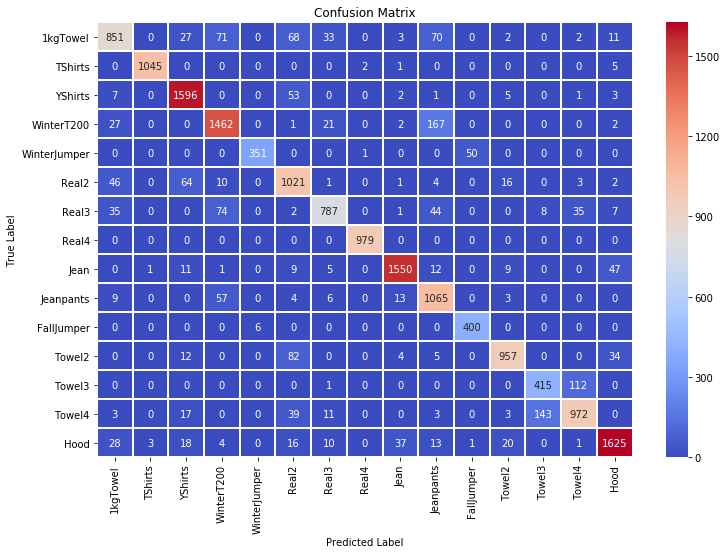

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      1138
           1       1.00      0.99      0.99      1053
           2       0.91      0.96      0.94      1668
           3       0.87      0.87      0.87      1682
           4       0.98      0.87      0.92       402
           5       0.79      0.87      0.83      1168
           6       0.90      0.79      0.84       993
           7       1.00      1.00      1.00       979
           8       0.96      0.94      0.95      1645
           9       0.77      0.92      0.84      1157
          10       0.89      0.99      0.93       406
          11       0.94      0.87      0.91      1094
          12       0.73      0.79      0.76       528
          13       0.86      0.82      0.84      1191
          14       0.94      0.91      0.93      1776

    accuracy                           0.89     16880
   macro avg       0.89      0.89      0.89     16880
weighted avg       0.90   

In [167]:
y_pred_test = model.predict(X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [0]:
#print(X_data[X1_data.shape[0]].reshape(1, 140, 5))
print(y[3].reshape(1, 1, 15))
for i in range(X_data.shape[0]):
  x_input = X_data[i].reshape(1, 140, 5)
  yhat = model.predict(x_input, verbose=0)
  print([ "{:0.2f}".format(x) for x in yhat[0] ])

In [0]:
from google.colab import files
files.upload()

Normalization 할 것

Conv1D를 32 64 128 과 같은 방식으로

Dense Layer 이전을 100정도로, 삭제 하는것이 용량 아낌이 좋음

비슷한 Feature에 대해서 묶어 주면 Accuracy 상승 가능
